In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

In [3]:
df = pd.read_csv("data_2_cat.csv")

In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
df['tier'] = df['tier'].replace(['First','Second'],['1','2'])
df['tier'] = df['tier'].astype(float)

In [6]:
df.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.0
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1.0
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1.0
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1.0


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
df_copy = df

In [9]:
df_copy = df_copy.drop('Country',axis=1)

In [10]:
# Creating independent and dependent variables
X = df_copy.drop('tier',axis=1)
y = df_copy['tier']

In [11]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (744, 9), (744,)
Train Data: (187, 9), (187,)


In [12]:
# Training a binary classifier using Random Forest Algorithm with default hyperparameters
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

In [14]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 1.0


[[ 76   0]
 [  0 111]]


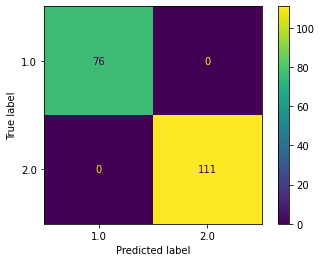

In [15]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [16]:
# Importing all necessary libraries
from sklearn.metrics import precision_score
#fixed error : https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary 
# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions,average='micro')}")

Precision Score of the classifier is: 1.0


In [17]:
# Importing all necessary libraries
from sklearn.metrics import recall_score
# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions, average='micro')}")

Recall Score of the classifier is: 1.0


In [18]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions, average='micro' )}")

F1 Score of the classifier is: 1.0


In [19]:
#from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
report = classification_report(y_test, predictions, target_names=target_names)

In [21]:
print(report)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        76
     class 1       1.00      1.00      1.00       111

    accuracy                           1.00       187
   macro avg       1.00      1.00      1.00       187
weighted avg       1.00      1.00      1.00       187

